# Requirements

## Install packages

In [1]:
import sys

!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install mlflow

## Imports

In [2]:
import pandas as pd
import wget
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go

## Download dataset

In [3]:
df = pd.read_csv("https://github.com/lgreski/pokemonData/raw/master/Pokemon.csv")

In [4]:
df.head()

,Number,Name,Type1,Type2,Total,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# Data visualization

## Seaborn

Seaborn is a data vizualization library. It provides with a high level API that allows to quickly draw nice and informative graphs. It has been designed to work with pandas dataframes.   

### Pairplot

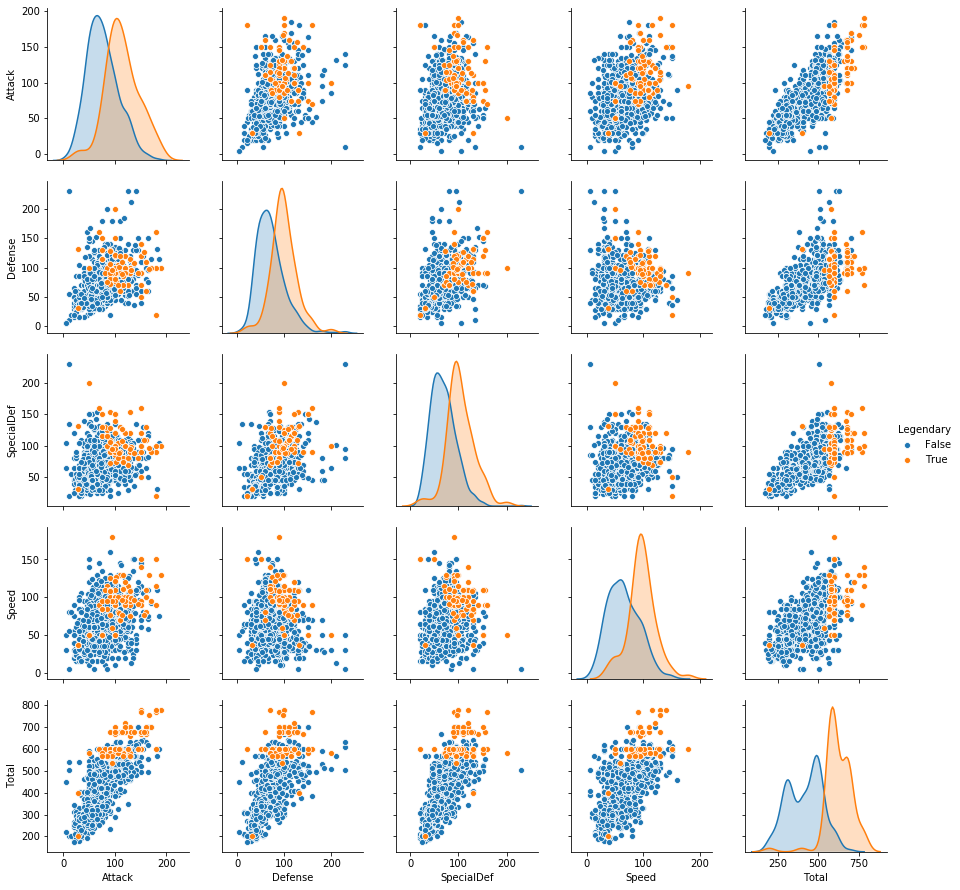

In [5]:
sns.pairplot(data=df, vars=["Attack", "Defense", "SpecialDef", "Speed", "Total"], hue="Legendary")

### Jointplot

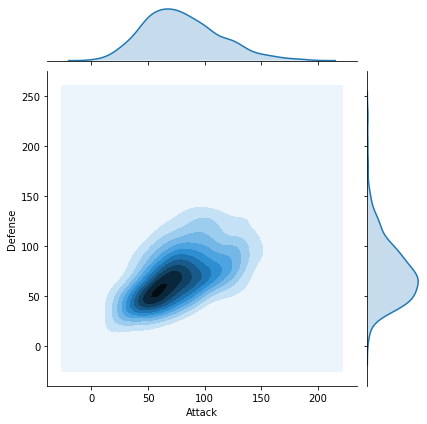

In [6]:
sns.jointplot(data=df, x='Attack', y='Defense', kind='kde')

### Dist plots

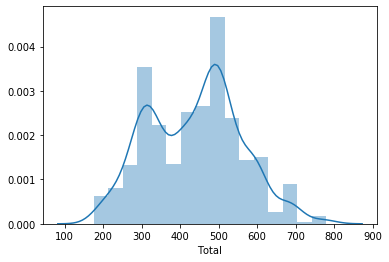

In [7]:
sns.distplot(df["Total"])

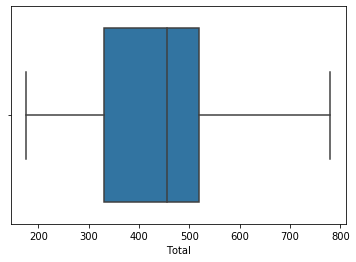

In [8]:
sns.boxplot(x="Total", data=df)

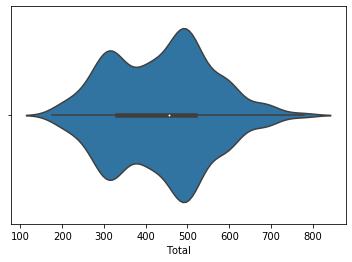

In [9]:
sns.violinplot(x="Total", data=df)

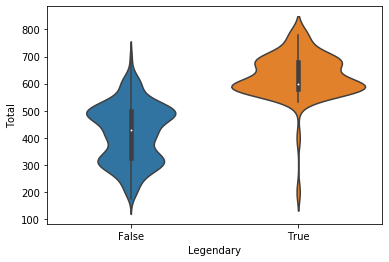

In [10]:
sns.violinplot(x="Legendary", y="Total", data=df)

### Reg plots

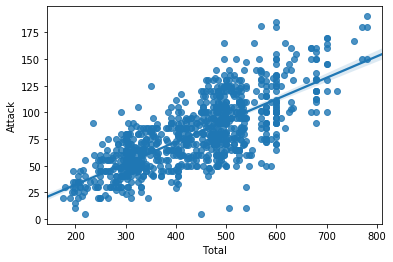

In [11]:
sns.regplot(x="Total", y="Attack", data=df)

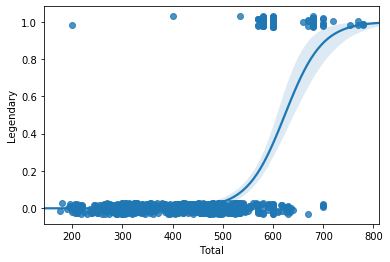

In [12]:
sns.regplot(x="Total", y="Legendary", data=df, logistic=True, y_jitter=.03)

## Going further

https://seaborn.pydata.org/

## Plotly

Plotly is a graphing library that allows to build interactive graphs that can be published online.

In [13]:
py.init_notebook_mode(connected=True)

In [14]:
# Build traces

trace0 = go.Scatter(
    x = df[df.Legendary == False].Attack,
    y = df[df.Legendary == False].Total,
    hovertext = df[df.Legendary == False].Name,
    mode = 'markers',
    name = 'Regular'
)
trace1 = go.Scatter(
    x = df[df.Legendary].Attack,
    y = df[df.Legendary].Total,
    hovertext = df[df.Legendary].Name,
    mode = 'markers',
    name = 'Legendary'
)

# Build layout
layout = go.Layout(
    xaxis=dict(
        title="Attack"
    ),
    yaxis=dict(
        title="Total"
    )
)

# Build figure from figures and layout
fig = go.Figure(data=[trace0, trace1], layout=layout)

# Plot figure
py.iplot(fig)

In [15]:
heat_map_df = df.groupby(['Type1', 'Type2'])['Total'].mean().reset_index()
trace1 = go.Heatmap(z=heat_map_df.Total, x=heat_map_df.Type1, y=heat_map_df.Type2)
trace2 = go.Heatmap(z=heat_map_df.Total, x=heat_map_df.Type1, y=heat_map_df.Type2)
py.iplot([trace1, trace2])

## Going further

https://plot.ly/python/